# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder, Binarizer, KBinsDiscretizer,
    MinMaxScaler, StandardScaler, PolynomialFeatures
)
from sklearn.feature_extraction.text import (
    CountVectorizer, TfidfTransformer, TfidfVectorizer
)
from sklearn.datasets import load_digits, fetch_20newsgroups

In [2]:
'''# Algumas configurações para o matplotlib.
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()'''

'# Algumas configurações para o matplotlib.\n%matplotlib inline\n\nfrom IPython.core.pylabtools import figsize\n\n\nfigsize(12, 8)\n\nsns.set()'

In [3]:
# countries = pd.read_csv("countries.csv", decimal= ',')

In [4]:
# column_names = [
#     "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
#     "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
#     "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
#     "Industry", "Service"
# ]

# countries.columns = column_names

In [5]:
# colunas_float = list(countries.columns[countries.dtypes == 'float64'])

In [6]:
colunas_float = ['Pop_density',
 'Coastline_ratio',
 'Net_migration',
 'Infant_mortality',
 'GDP',
 'Literacy',
 'Phones_per_1000',
 'Arable',
 'Crops',
 'Other',
 'Climate',
 'Birthrate',
 'Deathrate',
 'Agriculture',
 'Industry',
 'Service']

## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

In [7]:
countries =   pd.read_csv("countries.csv")

In [8]:
column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = column_names

In [9]:
df = countries.copy()
df['Country'] = df.Country.str.strip()
df['Region'] = df.Region.str.strip()

In [10]:
df[colunas_float].columns

Index(['Pop_density', 'Coastline_ratio', 'Net_migration', 'Infant_mortality',
       'GDP', 'Literacy', 'Phones_per_1000', 'Arable', 'Crops', 'Other',
       'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry',
       'Service'],
      dtype='object')

In [11]:
for col in colunas_float:
    df[col] = df[col].replace(',', '.', regex = True)

In [12]:
df[colunas_float] = df[colunas_float].astype(float)

## Inicia sua análise a partir daqui

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [13]:
 lista = list(df.Region.sort_values().unique())

In [14]:
def q1():
    return lista
    pass

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [15]:
from sklearn.preprocessing import KBinsDiscretizer

In [16]:
q2_df = df.copy()

In [17]:
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
discretizer.fit(df[['Pop_density']])
q2_df['score_bins'] = discretizer.transform(df[['Pop_density']])

In [18]:
#conferindo o percentil 90
percentil = np.percentile(q2_df['score_bins'], 90)

# df com dados acima do percentil
q2_df = q2_df[q2_df['score_bins'] > percentil]

q2_df.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,score_bins
15,Bahrain,NEAR EAST,698585,665,1050.5,24.21,1.05,17.27,16900.0,89.1,...,2.82,5.63,91.55,1.0,17.80,4.14,0.005,0.387,0.608,9.0
16,Bangladesh,ASIA (EX. NEAR EAST),147365352,144000,1023.4,0.40,-0.71,62.60,1900.0,43.1,...,62.11,3.07,34.82,2.0,29.80,8.27,0.199,0.198,0.603,9.0
17,Barbados,LATIN AMER. & CARIB,279912,431,649.5,22.51,-0.31,12.50,15700.0,97.4,...,37.21,2.33,60.46,2.0,12.71,8.67,0.060,0.160,0.780,9.0
22,Bermuda,NORTHERN AMERICA,65773,53,1241.0,194.34,2.49,8.53,36000.0,98.0,...,20.00,0.00,80.00,2.0,11.40,7.74,0.010,0.100,0.890,9.0
74,Gaza Strip,NEAR EAST,1428757,360,3968.8,11.11,1.60,22.93,600.0,NaN,...,28.95,21.05,50.00,3.0,39.45,3.80,0.030,0.283,0.687,9.0


In [19]:
def q2():
    result = int(len(q2_df.Country.unique()))
    return result
    pass

In [20]:
q2()

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [21]:
'''one_hot_encoder = OneHotEncoder(sparse=False, dtype=np.int, handle_unknown="ignore")
region_encoded = one_hot_encoder.fit_transform(df[['Region']])'''

'one_hot_encoder = OneHotEncoder(sparse=False, dtype=np.int, handle_unknown="ignore")\nregion_encoded = one_hot_encoder.fit_transform(df[[\'Region\']])'

In [22]:
# region_encoded.shape[1]

In [23]:
# region_result = region_encoded.shape[1]
# climate_result = len(df.Climate.unique())
# result_q3 = int(region_result + climate_result)

In [24]:
def q3():
    return int(18)
    pass

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [25]:
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("standard_scaler", StandardScaler())
])

In [26]:
df_numeric = df[list(df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')])]

In [27]:
df_numeric.head()

,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [28]:
num_pipeline.fit_transform(df_numeric)

array([[ 0.01969468,  0.02758332, -0.19984434, ...,  1.63657562,
        -0.31540576, -1.1611354 ],
       [-0.21387688, -0.31879748, -0.15360296, ...,  0.59516349,
        -0.70631815,  0.08342432],
       [ 0.03561811,  0.99842051, -0.22048996, ..., -0.32662697,
         2.39091078, -1.67396905],
       ...,
       [-0.06192308, -0.03933023, -0.20431152, ..., -0.08738364,
         1.4286649 , -1.0798325 ],
       [-0.14654488,  0.08642673, -0.21958445, ...,  0.51072467,
         0.06047154, -0.47944188],
       [-0.14029829, -0.11624192, -0.20992568, ...,  0.22222537,
        -0.29285312,  0.08342432]])

In [29]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [30]:
test_country = np.array(test_country[2:]).reshape(1,-1)

In [31]:
country_transformation = num_pipeline.transform(test_country)

In [32]:
country_transformation

array([[-0.24432501, -0.33489095, -0.22884735, -0.29726002,  0.01959086,
        -1.02861728, -0.96623348, -4.35427242, -1.03720972, -1.04685743,
        -0.55058149, -5.10112169, -1.21812201, -2.02455164, -1.99092137,
        -7.04915046, -0.13915481,  0.03490335]])

In [33]:
#criando um df com as colunas e os resultados
q4_df = pd.DataFrame(country_transformation, columns=df_numeric.columns)
q4_df.head()

,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,-0.244325,-0.334891,-0.228847,-0.29726,0.019591,-1.028617,-0.966233,-4.354272,-1.03721,-1.046857,-0.550581,-5.101122,-1.218122,-2.024552,-1.990921,-7.04915,-0.139155,0.034903


In [34]:
q4_df.Arable

0   -1.046857
Name: Arable, dtype: float64

In [35]:
def q4():
    result = round(float(q4_df.Arable),3)
    return result
    pass

In [36]:
q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [37]:
net_copy = df.Net_migration.copy()

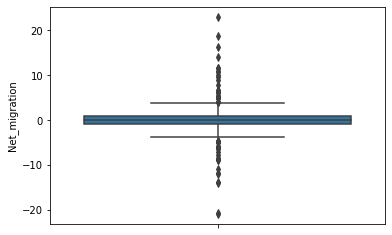

In [38]:
sns.boxplot(net_copy, orient = 'vertical')

In [39]:
q1 = net_copy.quantile(0.25)
q3 = net_copy.quantile(0.75)
iqr = q3 - q1

out_abaixo = q1 - 1.5 * iqr
out_acima = q3 + 1.5 * iqr
non_outlier_interval_iqr= [out_abaixo, out_acima]

print(f"Faixa considerada \"normal\": {non_outlier_interval_iqr}")

Faixa considerada "normal": [-3.8149999999999995, 3.885]


In [40]:
outliers_abaixo = net_copy[net_copy < out_abaixo]
outliers_acima = net_copy[net_copy > out_acima]
outliers_remover = net_copy[(net_copy<out_abaixo) | (net_copy>out_acima)]

In [41]:
outliers_perc = len(outliers_remover)/len(net_copy)

In [42]:
# conferindo se a % de outliers removidos é menor do que 5%
outliers_perc < 0.05

False

In [43]:
def q5():
    return(tuple((len(outliers_abaixo), len(outliers_acima), outliers_perc < 0.05)))
    pass

In [44]:
q5()

(24, 26, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [45]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [46]:
contador = CountVectorizer()
newsgroups_counts = contador.fit_transform(newsgroup.data)

In [47]:
word = u'phone'
n_phone = contador.vocabulary_.get(f"{word.lower()}")

In [48]:
newsgroups_counts[:,n_phone].sum()

213

In [49]:
def q6():
    result = int(newsgroups_counts[:,n_phone].sum())
    return result
    pass

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [50]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit_transform(newsgroup.data)

newsgroups_tfidf_vectorized = tfidf_vectorizer.fit_transform(newsgroup.data)

In [51]:
word = tfidf_vectorizer.get_feature_names().index(word)

In [52]:
tf_idf_phone = round(newsgroups_tfidf_vectorized[:,word].sum(),3)

In [53]:
tf_idf_phone

8.888

In [54]:
def q7():
    return float(tf_idf_phone)
    pass